In [79]:
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import font_manager as fm

import vis_utils
from custom_colors import *

plt.style.use('default')

font_path = r'C:\Users\Felix\AppData\Local\Microsoft\Windows\Fonts\SourceSansPro-Regular.ttf'
fm.fontManager.addfont(font_path)
source_sans_pro = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = source_sans_pro.get_name()

In [2]:
STORE = False
# STORE = True

In [37]:
df_raw = pd.read_csv("data/runs-17_19_25-05-May-25.csv")
df_raw = df_raw.drop([0], axis=0)

In [38]:
df_raw

,run,experiment,AUC_val,AUC_train,nr_params,avg_epoch_time,nr_flops,training_time_min,date,duration,...,model_config.num_kernels_conv1,model_config.num_kernels_conv2,model_config.optuna.n_startup_trials,model_config.optuna.n_trials,model_config.optuna.study_name,model_config.s_act_fn,model_config.s_proj_factor,model_config.scale_targets,model_config.test_data_file,model_config.val_data_file
1,Run: 6ada35eb6a82421aaaacefa7,binary/transformer/7_transformer,0.67944516,0.68854568,159937,3.55982921,408935584,316.8248,"10:59:30 · 05 May, 25",5hrs 56min,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
2,Run: 4d277f1b3a4543e7ac5e1a56,binary/baseline/6_baseline_freq,0.72241166,0.77731773,68417,0.12854184,66048,18.1244,"23:41:06 · 04 May, 25",19min 48sec,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
3,Run: e837404819ba461187beab5c,binary/baseline/10_baseline,0.67754543,0.87436813,177091329,0.53333333,177078528,8,"23:25:37 · 04 May, 25",12min 47sec,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
4,Run: 1f6b8300ed634a2ca3b4b0ca,binary/lstm/6_lstm,0.66237873,0.67665606,8976193,1.731788,37920,43.2947,"22:06:57 · 04 May, 25",1hrs 18min,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
5,Run: 331b662dffa74fcea45db50b,binary/xlstm/11_xlstm,0.68747223,0.70440183,97793,5.53596591,215165520,243.5825,"21:30:42 · 04 May, 25",9hrs 6min,...,"""-""","""-""",10,150,"""codon_final_2""","""gelu""",1,False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
6,Run: 35c04eaa330d48d190879d96,binary/gru/24_gru,0.6550097,0.66035869,1821569,1.36342708,35392,130.889,"19:49:42 · 04 May, 25",2hrs 17min,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
7,Run: 23423b51958848729591f19e,binary/mamba/13_mamba,0.66033022,0.73992494,260865,0.2889,353911552,14.445,"19:31:18 · 04 May, 25",18min 9sec,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
8,Run: f4e911ab89064cc880ad52ac,binary/RiboNN/1_RiboNN,0.69063552,0.70807953,1137089,0.17513529,636920096,5.9546,"19:21:53 · 04 May, 25",9min 12sec,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
9,Run: c1a48b38f7aa4f47a2e053a5,binary/cnn/16_cnn,0.68677206,0.71755938,192289,0.12031333,115040,1.8047,"19:17:50 · 04 May, 25",3min 51sec,...,64,32,10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""
10,Run: d61dfa5864e444ee8c44f9e3,binary/LegNet/3_LegNet,0.69297586,0.73041646,5178971,1.54770625,59553722,99.0532,"19:16:58 · 04 May, 25",2hrs 13min,...,"""-""","""-""",10,150,"""codon_final_2""","""-""","""-""",False,"""codon_test_8.1k_data.pkl""","""codon_val_8.1k_data.pkl"""


In [39]:
for l in df_raw.columns:
    if "ccur" in l:
        print(l)

Accuracy_train
Accuracy_val


In [40]:
# Other scores
df_raw[["model_config.model", "AUC_val", "F1_val", "Precision_val", "Recall_val", "Accuracy_val"]]

,model_config.model,AUC_val,F1_val,Precision_val,Recall_val,Accuracy_val
1,"""transformer""",0.67944516,0.64050901,0.62655602,0.65509761,0.63324919
2,"""baseline""",0.72241166,0.65394688,0.67751938,0.63195951,0.66642625
3,"""baseline""",0.67754543,0.61428571,0.63978074,0.59074476,0.63000361
4,"""lstm""",0.66237873,0.6037594,0.62881754,0.58062184,0.61990624
5,"""xlstm""",0.68747223,0.6231454,0.63975628,0.60737527,0.63360981
6,"""gru""",0.6550097,0.60588016,0.62423313,0.58857556,0.61810314
7,"""mamba""",0.66033022,0.61430159,0.62993921,0.59942155,0.6245943
8,"""RiboNN""",0.69063552,0.62922173,0.63907532,0.61966739,0.63577353
9,"""cnn""",0.68677206,0.62200599,0.6446858,0.60086768,0.63577353
10,"""LegNet""",0.69297586,0.64043716,0.64537445,0.63557484,0.6440678


In [41]:
# Other scores
df_raw[["model_config.model", "AUC_val", "F1_val", "Precision_val", "Recall_val", "Accuracy_val"]]

,model_config.model,AUC_val,F1_val,Precision_val,Recall_val,Accuracy_val
1,"""transformer""",0.67944516,0.64050901,0.62655602,0.65509761,0.63324919
2,"""baseline""",0.72241166,0.65394688,0.67751938,0.63195951,0.66642625
3,"""baseline""",0.67754543,0.61428571,0.63978074,0.59074476,0.63000361
4,"""lstm""",0.66237873,0.6037594,0.62881754,0.58062184,0.61990624
5,"""xlstm""",0.68747223,0.6231454,0.63975628,0.60737527,0.63360981
6,"""gru""",0.6550097,0.60588016,0.62423313,0.58857556,0.61810314
7,"""mamba""",0.66033022,0.61430159,0.62993921,0.59942155,0.6245943
8,"""RiboNN""",0.69063552,0.62922173,0.63907532,0.61966739,0.63577353
9,"""cnn""",0.68677206,0.62200599,0.6446858,0.60086768,0.63577353
10,"""LegNet""",0.69297586,0.64043716,0.64537445,0.63557484,0.6440678


In [42]:
df = df_raw[["experiment", 'AUC_val', 'AUC_train', 'training_time_min', 'avg_epoch_time', 'nr_params', 'nr_flops', "best_epoch", "model_config.model", "F1_val", "Precision_val", "Recall_val", "Accuracy_val"]]

In [43]:
df.loc[:, "model_config.model"] = ["baseline_freq" if "freq" in name else model.strip("\"") for name, model in zip(df["experiment"], df["model_config.model"])]
df = df.rename(columns={'model_config.model': 'model', "avg_epoch_time": "avg_epoch_min"})
df = df.drop("experiment", axis=1)

In [44]:
cols_to_convert = [col for col in df.columns if col != 'model']
df.loc[:, cols_to_convert] = df[cols_to_convert].astype(float)

In [45]:
df.columns

Index(['AUC_val', 'AUC_train', 'training_time_min', 'avg_epoch_min',
       'nr_params', 'nr_flops', 'best_epoch', 'model', 'F1_val',
       'Precision_val', 'Recall_val', 'Accuracy_val'],
      dtype='object')

In [46]:
# custom colnames
# "val" scores are actually test, because the set to evaluate for this data was test
df.columns = ["test AUC", "train AUC", "train time (min.)", "avg epoch time (min.)", "# parameters", "# FLOPS", "best epoch", "model", "test F1 Score", "test Precision", "test Recall", "test Accuracy"]

In [47]:
# Adding validation AUC (tuning) results

    #  "MLP Baseline": {
    #     "val AUC": 0.6686054843599283,
    # "MLP Freq": {
    #     "val AUC": 0.7248128243994304,
    # "CNN": {
    #     "val AUC": 0.6908984428827338,
    # "LegNet": {
    #     "val AUC": 0.710789582472096,
    # "RiboNN": {
    #     "val AUC": 0.6990592990675669,
    # "LSTM": {
    #     "val AUC": 0.6774309861742686,
    # "GRU": {
    #     "val AUC": 0.6836840292131734,
    # "xLSTM": {
    #     "val AUC": 0.6890615957007028,
    # "Transformer": {
    #     "val AUC": 0.680868127325341,
    # "Mamba": {
    #     "val AUC": 0.686000643057278,

df_val = pd.DataFrame(
    {
        "val AUC (tuning)": [
            0.6686054843599283,
            0.7248128243994304,
            0.6908984428827338,
            0.710789582472096,
            0.6990592990675669,
            0.6774309861742686,
            0.6836840292131734,
            0.6890615957007028,
            0.680868127325341,
            0.686000643057278
        ]
    },
    index=["baseline", "baseline_freq", "cnn", "LegNet", "RiboNN", "lstm", "gru", "xlstm", "transformer", "mamba"]
)

# merge with df (on model column
df = df.merge(df_val, left_on="model", right_index=True) #, suffixes=("", "_val")

In [48]:
df

,test AUC,train AUC,train time (min.),avg epoch time (min.),# parameters,# FLOPS,best epoch,model,test F1 Score,test Precision,test Recall,test Accuracy,val AUC (tuning)
1,0.679445,0.688546,316.8248,3.559829,159937.0,408935584.0,89.0,transformer,0.640509,0.626556,0.655098,0.633249,0.680868
2,0.722412,0.777318,18.1244,0.128542,68417.0,66048.0,141.0,baseline_freq,0.653947,0.677519,0.63196,0.666426,0.724813
3,0.677545,0.874368,8.0,0.533333,177091329.0,177078528.0,15.0,baseline,0.614286,0.639781,0.590745,0.630004,0.668605
4,0.662379,0.676656,43.2947,1.731788,8976193.0,37920.0,25.0,lstm,0.603759,0.628818,0.580622,0.619906,0.677431
5,0.687472,0.704402,243.5825,5.535966,97793.0,215165520.0,44.0,xlstm,0.623145,0.639756,0.607375,0.63361,0.689062
6,0.65501,0.660359,130.889,1.363427,1821569.0,35392.0,96.0,gru,0.60588,0.624233,0.588576,0.618103,0.683684
7,0.66033,0.739925,14.445,0.2889,260865.0,353911552.0,50.0,mamba,0.614302,0.629939,0.599422,0.624594,0.686001
8,0.690636,0.70808,5.9546,0.175135,1137089.0,636920096.0,34.0,RiboNN,0.629222,0.639075,0.619667,0.635774,0.699059
9,0.686772,0.717559,1.8047,0.120313,192289.0,115040.0,15.0,cnn,0.622006,0.644686,0.600868,0.635774,0.690898
10,0.692976,0.730416,99.0532,1.547706,5178971.0,59553722.0,64.0,LegNet,0.640437,0.645374,0.635575,0.644068,0.710790


In [49]:
# Results RFC (train+val, and test)

# RandomForestClassifier
# Training Time (s): 18.88788938522339

# Train Accuracy: 1.0
# Train Precision: 1.0
# Train Recall: 1.0
# Train F1: 1.0

# Test ROC AUC: 0.6681921274260418
# Test Accuracy: 0.6119725928597187
# Test Precision: 0.6097212294496068
# Test Recall: 0.6167751265365148
# Test F1: 0.6132278936017254

# train, val data results
# Validation ROC AUC: 0.6634033806439759
# Validation Accuracy: 0.6123348017621145
# Validation Precision: 0.6101131071190952
# Validation Recall: 0.6216949152542373
# Validation F1: 0.615849563465413


rfc_data = {
    "test AUC": 0.6681921274260418,
    "test F1 Score": 0.6132278936017254,
    "test Precision": 0.6097212294496068,
    "test Recall": 0.6167751265365148,
    "val AUC (tuning)": 0.6634033806439759,
    "train AUC": np.nan,
    "train time (min.)": 18.887889 / 60,
    "avg epoch time (min.)": np.nan,
    "# parameters": np.nan,
    "# FLOPS": np.nan,
    "best epoch": np.nan,
    "model": "RFC (freq)"
}

rfc_df = pd.DataFrame(rfc_data, index=[0])

df = pd.concat([df, rfc_df], axis=0)
df.reset_index(drop=True, inplace=True)

In [50]:
# add PTRnet results (31_ptrnet_freq)
ptrnet_data = {
    "test AUC": 0.68598397,
    "test F1 Score": 0.63157895,
    "test Precision": 0.64317841,
    "test Recall": 0.62039046,
    "test Accuracy": 0.63901911,
    "val AUC (tuning)": np.nan,
    "train AUC": 0.71945254,
    "train time (min.)": 13.3331 / 60,
    "avg epoch time (min.)": 0.40403333,
    "# parameters": 272033,
    "# FLOPS": 13556666368,
    "best epoch": 33,
    "model": "PTRnet"
}

ptrnet_df = pd.DataFrame(ptrnet_data, index=[0])

df = pd.concat([df, ptrnet_df], axis=0)
df.reset_index(drop=True, inplace=True)

In [51]:
df

,test AUC,train AUC,train time (min.),avg epoch time (min.),# parameters,# FLOPS,best epoch,model,test F1 Score,test Precision,test Recall,test Accuracy,val AUC (tuning)
0,0.679445,0.688546,316.8248,3.559829,159937.0,408935584.0,89.0,transformer,0.640509,0.626556,0.655098,0.633249,0.680868
1,0.722412,0.777318,18.1244,0.128542,68417.0,66048.0,141.0,baseline_freq,0.653947,0.677519,0.63196,0.666426,0.724813
2,0.677545,0.874368,8.0,0.533333,177091329.0,177078528.0,15.0,baseline,0.614286,0.639781,0.590745,0.630004,0.668605
3,0.662379,0.676656,43.2947,1.731788,8976193.0,37920.0,25.0,lstm,0.603759,0.628818,0.580622,0.619906,0.677431
4,0.687472,0.704402,243.5825,5.535966,97793.0,215165520.0,44.0,xlstm,0.623145,0.639756,0.607375,0.63361,0.689062
5,0.65501,0.660359,130.889,1.363427,1821569.0,35392.0,96.0,gru,0.60588,0.624233,0.588576,0.618103,0.683684
6,0.66033,0.739925,14.445,0.2889,260865.0,353911552.0,50.0,mamba,0.614302,0.629939,0.599422,0.624594,0.686001
7,0.690636,0.70808,5.9546,0.175135,1137089.0,636920096.0,34.0,RiboNN,0.629222,0.639075,0.619667,0.635774,0.699059
8,0.686772,0.717559,1.8047,0.120313,192289.0,115040.0,15.0,cnn,0.622006,0.644686,0.600868,0.635774,0.690898
9,0.692976,0.730416,99.0532,1.547706,5178971.0,59553722.0,64.0,LegNet,0.640437,0.645374,0.635575,0.644068,0.710790


In [52]:
df.index = df.model
df = df.rename(index={
    "baseline": "MLP (baseline)",
    "baseline_freq": "MLP (freq)",
    "cnn": "CNN",
    "gru": "GRU",
    "lstm": "LSTM",
    "mamba": "Mamba",
    "transformer": "Transformer",
    "xlstm": "xLSTM",
    "LEGnet": "LEGnet",
    "RFC (freq)": "RFC (freq)",
    "PTRnet": "PTRnet"
})

In [56]:
df

,test AUC,train AUC,train time (min.),avg epoch time (min.),# parameters,# FLOPS,best epoch,model,test F1 Score,test Precision,test Recall,test Accuracy,val AUC (tuning)
model,,,,,,,,,,,,,
Transformer,0.679445,0.688546,316.8248,3.559829,159937.0,408935584.0,89.0,transformer,0.640509,0.626556,0.655098,0.633249,0.680868
MLP (freq),0.722412,0.777318,18.1244,0.128542,68417.0,66048.0,141.0,baseline_freq,0.653947,0.677519,0.63196,0.666426,0.724813
MLP (baseline),0.677545,0.874368,8.0,0.533333,177091329.0,177078528.0,15.0,baseline,0.614286,0.639781,0.590745,0.630004,0.668605
LSTM,0.662379,0.676656,43.2947,1.731788,8976193.0,37920.0,25.0,lstm,0.603759,0.628818,0.580622,0.619906,0.677431
xLSTM,0.687472,0.704402,243.5825,5.535966,97793.0,215165520.0,44.0,xlstm,0.623145,0.639756,0.607375,0.63361,0.689062
GRU,0.65501,0.660359,130.889,1.363427,1821569.0,35392.0,96.0,gru,0.60588,0.624233,0.588576,0.618103,0.683684
Mamba,0.66033,0.739925,14.445,0.2889,260865.0,353911552.0,50.0,mamba,0.614302,0.629939,0.599422,0.624594,0.686001
RiboNN,0.690636,0.70808,5.9546,0.175135,1137089.0,636920096.0,34.0,RiboNN,0.629222,0.639075,0.619667,0.635774,0.699059
CNN,0.686772,0.717559,1.8047,0.120313,192289.0,115040.0,15.0,cnn,0.622006,0.644686,0.600868,0.635774,0.690898


## Create Table of Results

In [55]:
# TODO DROP PTRnet results
df_table = df.drop("PTRnet", axis=0)
df_table = df_table[['test AUC', 'val AUC (tuning)', 'train AUC', 'train time (min.)', 'avg epoch time (min.)',
       '# parameters', '# FLOPS', 'best epoch']]
df_table.sort_values(by="test AUC", ascending=False, inplace=True)
#df_table.reset_index(inplace=True)
df_table = df_table.round(5)
df_table[["# parameters", "# FLOPS"]] = df_table[["# parameters", "# FLOPS"]].astype(pd.Int64Dtype())
df_table

,test AUC,val AUC (tuning),train AUC,train time (min.),avg epoch time (min.),# parameters,# FLOPS,best epoch
model,,,,,,,,
MLP (freq),0.722412,0.72481,0.777318,18.1244,0.128542,68417,66048,141.0
LegNet,0.692976,0.71079,0.730416,99.0532,1.547706,5178971,59553722,64.0
RiboNN,0.690636,0.69906,0.70808,5.9546,0.175135,1137089,636920096,34.0
xLSTM,0.687472,0.68906,0.704402,243.5825,5.535966,97793,215165520,44.0
CNN,0.686772,0.69090,0.717559,1.8047,0.120313,192289,115040,15.0
Transformer,0.679445,0.68087,0.688546,316.8248,3.559829,159937,408935584,89.0
MLP (baseline),0.677545,0.66861,0.874368,8.0,0.533333,177091329,177078528,15.0
RFC (freq),0.668192,0.66340,NaN,0.314798,NaN,<NA>,<NA>,NaN
LSTM,0.662379,0.67743,0.676656,43.2947,1.731788,8976193,37920,25.0


In [ ]:
def transparent_nan(val):
    if pd.isnull(val) or val is pd.NA:
        return 'background-color: white; color: white;'
    return ''

df_table.index.name = None

styled_df = (
    df_table.style
    .background_gradient(subset=['test AUC'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['val AUC (tuning)'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['train AUC'], cmap='Greens')  # Color scale for 'train AUC'
    .background_gradient(subset=['train time (min.)'], cmap='Reds')  # Color scale for 'train time'
    .background_gradient(subset=['# parameters'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['# FLOPS'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['avg epoch time (min.)'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['best epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .map(transparent_nan)
    .format(precision=4)
)

styled_df

In [ ]:
# write to html
if STORE:
    html_path = os.path.join(os.getenv("OUTPUT_DIR"), "benchmark_results.html")
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(styled_df.to_html())

## Table of more Metrics (Appendix)

In [57]:
df_table2 = df.copy()[['train AUC', 'val AUC (tuning)', 'test AUC', "test F1 Score", "test Precision", "test Recall"]]
df_table2.sort_values(by="test AUC", ascending=False, inplace=True)
#df_table.reset_index(inplace=True)
df_table2 = df_table2.round(5)
df_table2

,train AUC,val AUC (tuning),test AUC,test F1 Score,test Precision,test Recall
model,,,,,,
MLP (freq),0.777318,0.72481,0.722412,0.653947,0.677519,0.63196
LegNet,0.730416,0.71079,0.692976,0.640437,0.645374,0.635575
RiboNN,0.70808,0.69906,0.690636,0.629222,0.639075,0.619667
xLSTM,0.704402,0.68906,0.687472,0.623145,0.639756,0.607375
CNN,0.717559,0.69090,0.686772,0.622006,0.644686,0.600868
PTRnet,0.719453,NaN,0.685984,0.631579,0.643178,0.62039
Transformer,0.688546,0.68087,0.679445,0.640509,0.626556,0.655098
MLP (baseline),0.874368,0.66861,0.677545,0.614286,0.639781,0.590745
RFC (freq),NaN,0.66340,0.668192,0.613228,0.609721,0.616775


In [58]:
def transparent_nan(val):
    if pd.isnull(val) or val is pd.NA:
        return 'background-color: white; color: white;'
    return ''

df_table2.index.name = None

styled_df = (
    df_table2.style
    .background_gradient(subset=['train AUC'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['val AUC (tuning)'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['test AUC'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['test F1 Score'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['test Precision'], cmap='Greens')  # Color scale for 'test AUC'
    .background_gradient(subset=['test Recall'], cmap='Greens')  # Color scale for 'test AUC'
    .map(transparent_nan)
    .format(precision=4)
    # make columns equally wide
    .set_table_styles([{
        'selector': 'th',
        'props': [('width', '400px')]
    }])
)

styled_df

,train AUC,val AUC (tuning),test AUC,test F1 Score,test Precision,test Recall
MLP (freq),0.7773,0.7248,0.7224,0.6539,0.6775,0.6320
LegNet,0.7304,0.7108,0.6930,0.6404,0.6454,0.6356
RiboNN,0.7081,0.6991,0.6906,0.6292,0.6391,0.6197
xLSTM,0.7044,0.6891,0.6875,0.6231,0.6398,0.6074
CNN,0.7176,0.6909,0.6868,0.6220,0.6447,0.6009
PTRnet,0.7195,nan,0.6860,0.6316,0.6432,0.6204
Transformer,0.6885,0.6809,0.6794,0.6405,0.6266,0.6551
MLP (baseline),0.8744,0.6686,0.6775,0.6143,0.6398,0.5907
RFC (freq),nan,0.6634,0.6682,0.6132,0.6097,0.6168
LSTM,0.6767,0.6774,0.6624,0.6038,0.6288,0.5806


In [ ]:
# write to html
if STORE:
    html_path = os.path.join(os.getenv("OUTPUT_DIR"), "benchmark_results_metrics.html")
    with open(html_path, "w", encoding="utf-8") as f:
        f.write(styled_df.to_html())

## Results Barplot

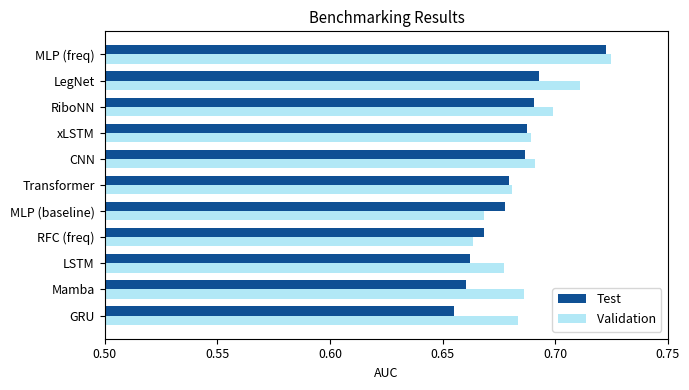

In [87]:
df_barplot = df_table.sort_values(by="test AUC", ascending=True)

fig, ax = plt.subplots(figsize=(7, 4))
bar_height = 0.35
y = range(len(df_barplot))

# Bars with spacing
ax.barh([i + bar_height / 2 for i in y], df_barplot["test AUC"], height=bar_height, label='Test', color=blue_shades[4])
ax.barh([i - bar_height / 2 for i in y], df_barplot["val AUC (tuning)"], height=bar_height, label='Validation', color=blue_shades[0])

# Labels and legend
ax.set_yticks(y)
ax.set_yticklabels(df_barplot.index)
ax.set_xlabel("AUC")
ax.set_title("Benchmarking Results")
ax.legend()
ax.set_xlim(0.5, max(df_barplot["val AUC (tuning)"].max(), df_barplot["test AUC"].max()) * 1.035)
plt.tight_layout()

if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + f"/benchmark_barplot.pdf", format="pdf", bbox_inches="tight")

plt.show()

## Subset Results Barplot

In [74]:
df_table2

,train AUC,val AUC (tuning),test AUC,test F1 Score,test Precision,test Recall
MLP (freq),0.777318,0.72481,0.722412,0.653947,0.677519,0.63196
LegNet,0.730416,0.71079,0.692976,0.640437,0.645374,0.635575
RiboNN,0.70808,0.69906,0.690636,0.629222,0.639075,0.619667
xLSTM,0.704402,0.68906,0.687472,0.623145,0.639756,0.607375
CNN,0.717559,0.69090,0.686772,0.622006,0.644686,0.600868
PTRnet,0.719453,NaN,0.685984,0.631579,0.643178,0.62039
Transformer,0.688546,0.68087,0.679445,0.640509,0.626556,0.655098
MLP (baseline),0.874368,0.66861,0.677545,0.614286,0.639781,0.590745
RFC (freq),NaN,0.66340,0.668192,0.613228,0.609721,0.616775
LSTM,0.676656,0.67743,0.662379,0.603759,0.628818,0.580622


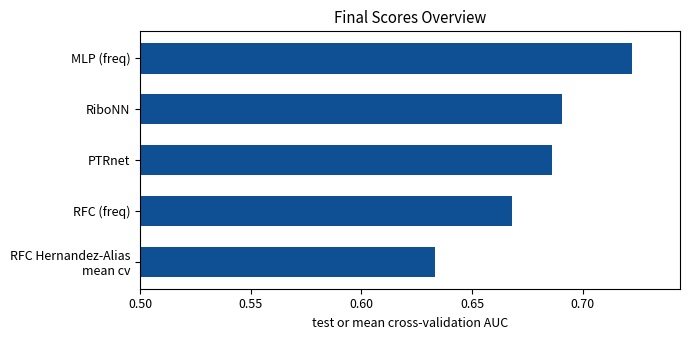

In [118]:
# Final Overview Plot
df_barplot_subset = df_table2.loc[["PTRnet", "RiboNN", "MLP (freq)", "RFC (freq)"]].sort_values(by="test AUC", ascending=True)

rfc_hernandez_df = pd.DataFrame({"train AUC": np.nan, "val AUC (tuning)": np.nan, "test AUC": 0.6333, "test F1 Score": np.nan, "test Precision": np.nan, "test Recall": np.nan}, index=["RFC Hernandez-Alias\nmean cv"])
df_barplot_subset = pd.concat([df_barplot_subset, rfc_hernandez_df], axis=0)

df_barplot_subset.sort_values(by="test AUC", ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(7, 3.5))
bar_height = 0.6
y = range(len(df_barplot_subset))

# Bars with spacing
ax.barh(y, df_barplot_subset["test AUC"], height=bar_height, label='Test', color=blue_shades[4])
# ax.barh([i - bar_height / 2 for i in y], df_barplot_subset["train AUC"], height=bar_height, label='Train', color=blue_shades[0])

# Labels and legend
ax.set_yticks(y)
ax.set_yticklabels(df_barplot_subset.index)
ax.set_xlabel("test or mean cross-validation AUC")
ax.set_title("Final Scores Overview")
# ax.legend()
ax.set_xlim(0.5, max(df_barplot_subset["test AUC"].max(), df_barplot_subset["test AUC"].max()) * 1.03)
plt.tight_layout()

if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + f"/benchmark_barplot_subset.pdf", format="pdf", bbox_inches="tight")

plt.show()

## Simulating AUC Scores for Random Majority Classifier

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, balanced_accuracy_score, precision_score, recall_score

# Simulated dataset
n_samples = 100
y_true = np.array([0]*90 + [1]*10)  # 90 negative, 10 positive
y_pred_majority_class = np.array([0]*100)  # Predict all as majority class (0)
y_scores_constant = np.array([0]*50 + [0.2]*50)  # Constant score for all (e.g., naive predictor)

# Metrics
roc_auc = roc_auc_score(y_true, y_scores_constant)
pr_auc = average_precision_score(y_true, y_scores_constant)
f1 = f1_score(y_true, y_pred_majority_class, zero_division=0)
balanced_acc = balanced_accuracy_score(y_true, y_pred_majority_class)
precision = precision_score(y_true, y_pred_majority_class, zero_division=0)
recall = recall_score(y_true, y_pred_majority_class, zero_division=0)

import pandas as pd
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'PR AUC', 'F1 Score', 'Balanced Accuracy', 'Precision', 'Recall'],
    'Value': [
        np.mean(y_pred_majority_class == y_true),
        roc_auc,
        pr_auc,
        f1,
        balanced_acc,
        precision,
        recall
    ]
})


metrics_df

In [ ]:
# Simulate random scores in [0, 0.5) to mimic a model that predicts low probabilities for all
# np.random.seed(42)
y_scores_low = np.random.uniform(0, 0.5, size=100)

# New metrics using these random low scores
roc_auc_low = roc_auc_score(y_true, y_scores_low)
pr_auc_low = average_precision_score(y_true, y_scores_low)

# Keep the thresholded class predictions (still all 0s since all probs < 0.5)
y_pred_low = (y_scores_low >= 0.5).astype(int)

f1_low = f1_score(y_true, y_pred_low, zero_division=0)
balanced_acc_low = balanced_accuracy_score(y_true, y_pred_low)
precision_low = precision_score(y_true, y_pred_low, zero_division=0)
recall_low = recall_score(y_true, y_pred_low, zero_division=0)

metrics_df_low = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'PR AUC', 'F1 Score', 'Balanced Accuracy', 'Precision', 'Recall'],
    'Value': [
        np.mean(y_pred_low == y_true),
        roc_auc_low,
        pr_auc_low,
        f1_low,
        balanced_acc_low,
        precision_low,
        recall_low
    ]
})

metrics_df_low


In [ ]:
y_scores_low